# Data Ukuran kecil: Predictive Modeling of E-Commerce Purchase Intent dari kaggle dengan link sebagai berikut:
https://www.kaggle.com/datasets/adilshamim8/online


In [1]:
%pip install pandas scikit-learn numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


- ## Load Dataset
Pada bagian ini kita akan memuat dataset yang sudah kita download sebelumnya.

In [2]:
import pandas as pd

df = pd.read_csv('../data/online_shoppers_intention.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.00,6,1156.500000,0.000000,0.033333,0.000000,0.0,Nov,2,2,1,20,Returning_Visitor,False,False
1,4,52.000000,1,7.00,46,3087.000000,0.003774,0.021384,16.946438,0.0,Mar,2,2,3,8,Returning_Visitor,False,True
2,4,106.500000,0,0.00,12,806.250000,0.012500,0.029167,0.000000,0.0,Dec,2,2,1,2,Returning_Visitor,False,False
3,9,497.166667,0,0.00,20,1170.166667,0.012121,0.023485,0.000000,0.0,Nov,3,2,3,2,Returning_Visitor,False,False
4,0,0.000000,0,0.00,3,17.000000,0.000000,0.033333,0.000000,0.0,Mar,1,1,1,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,4,46.300000,0,0.00,2,22.833333,0.000000,0.033333,0.000000,0.0,Nov,2,2,6,2,New_Visitor,True,True
12326,0,0.000000,0,0.00,19,989.333333,0.000000,0.011111,25.109000,0.0,May,3,2,1,2,New_Visitor,True,True
12327,4,68.107692,6,1022.25,104,8130.964914,0.003788,0.017635,5.907476,0.0,Nov,1,1,4,2,Returning_Visitor,False,True
12328,0,0.000000,0,0.00,39,963.166667,0.005405,0.028829,9.922973,0.6,May,2,6,2,3,Returning_Visitor,False,False


- ## Informasi Struktur DataFrame
Bagian ini menampilkan informasi struktur DataFrame, termasuk jumlah baris, kolom, tipe data setiap kolom, dan jumlah data non-null pada dataset.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

- ## Cek Missing Value
Pada bagian ini kita akan mengecek apakah ada data yang hilang pada dataset kita.

In [4]:
print(f"Nilai yang hilang:\n{df.isnull().sum()}")

Nilai yang hilang:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


- ## Cek Data Terduplikat
Pada bagian ini kita akan mengecek apakah ada data yang terduplikat pada dataset kita

In [5]:
print(f"Data yang terduplikat: {df.duplicated().sum()}")

Data yang terduplikat: 125


Pada bagian ini, data duplikat dihapus dari DataFrame untuk memastikan tidak ada baris yang sama yang dapat mempengaruhi analisis dan pemodelan selanjutnya.

In [6]:
df = df.drop_duplicates()
print(f"Jumlah data setelah menghapus duplikat: {len(df)}")

Jumlah data setelah menghapus duplikat: 12205


- ## Konversi Kolom Weekend dan Revenue ke Tipe Data Integer
Pada bagian ini, kita akan mengubah tipe data kolom `Weekend` dan `Revenue` menjadi integer agar dapat digunakan dalam analisis dan pemodelan selanjutnya.

In [7]:
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType              12

C:\Users\ACER\AppData\Local\Temp\ipykernel_16620\3263519718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weekend'] = df['Weekend'].astype(int)
C:\Users\ACER\AppData\Local\Temp\ipykernel_16620\3263519718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Revenue'] = df['Revenue'].astype(int)


- ## Visualisasi Outlier pada Kolom Numerik dengan Boxplot
Pada bagian ini, kita akan memvisualisasikan outlier pada setiap fitur numerik menggunakan boxplot untuk membantu identifikasi data ektrem pada masing-masing fitur.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

outlier_indices = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_indices[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index

plt.figure(figsize=(16, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, (len(numerical_cols)+1)//2, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

- ## Menangani dan Memvisualisasikan Outlier pada Data Numerik
Pada bagian ini, kita akan menangani outlier pada setiap fitur numerik dengan metode IQR (Interquartile Range) dan kemudian memvisualisasikan hasilnya menggunakan boxplot untuk memastikan outlier telah ditangani dengan baik.

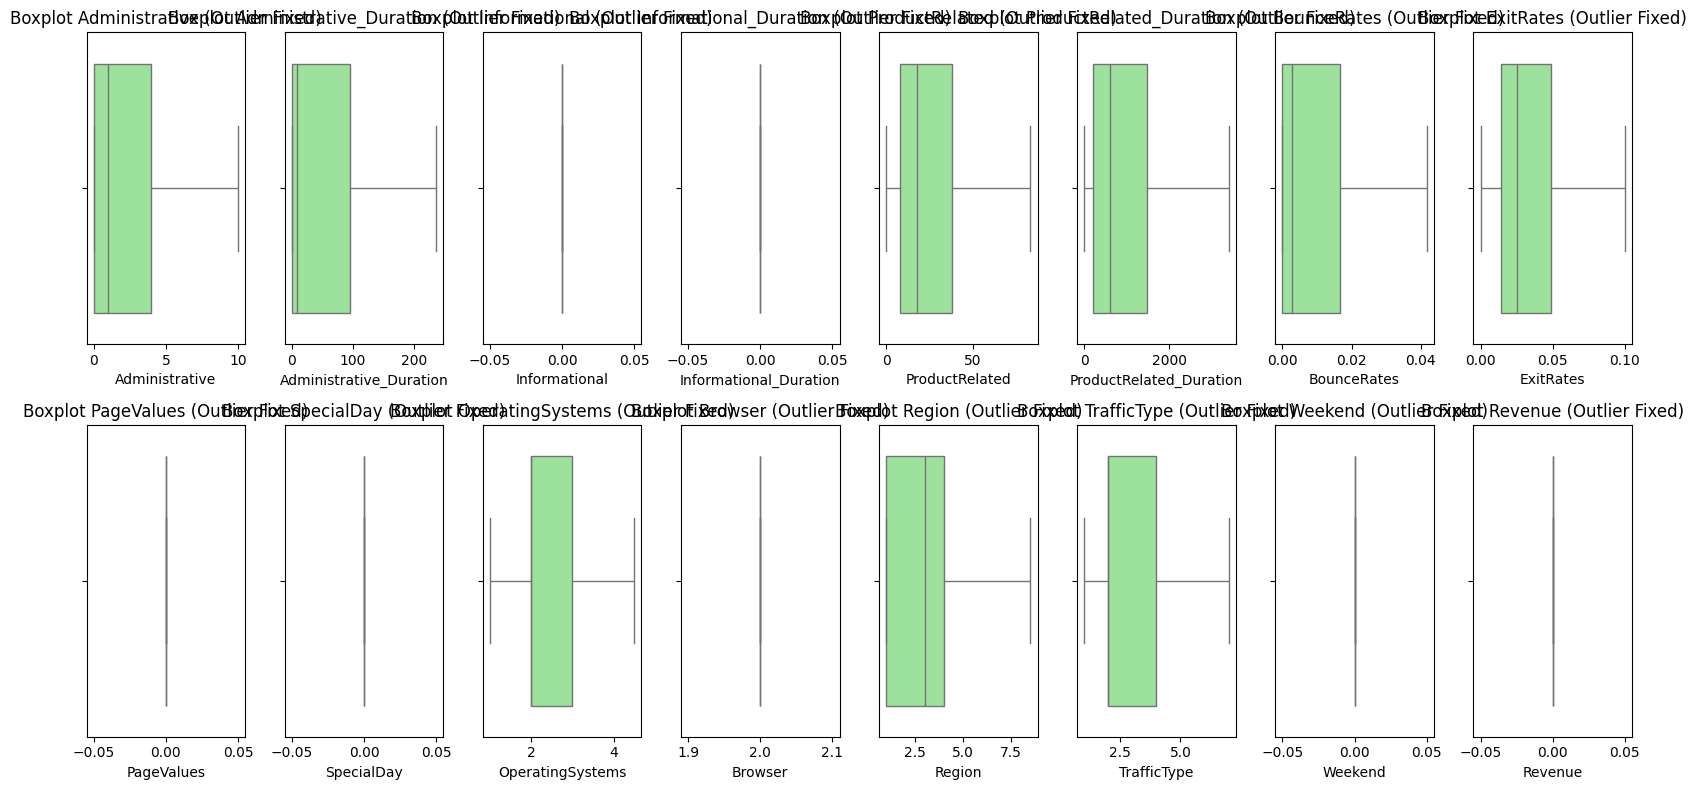

In [ ]:
df_outlier_fixed = df.copy()
for col in numerical_cols:
    Q1 = df_outlier_fixed[col].quantile(0.25)
    Q3 = df_outlier_fixed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_outlier_fixed[col] = df_outlier_fixed[col].clip(lower=lower_bound, upper=upper_bound)

plt.figure(figsize=(16, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, (len(numerical_cols)+1)//2, i)
    sns.boxplot(x=df_outlier_fixed[col], color='lightgreen')
    plt.title(f'Boxplot {col} (Outlier Fixed)')
plt.tight_layout()
plt.show()  

- ## Label Encoding pada Kolom Kategori
Pada bagian ini, kita akan melakukan label encoding pada beberapa kolom kategori untuk mempersiapkan data sebelum proses modeling.

In [ ]:
from sklearn.preprocessing import LabelEncoder

cols_to_encode = ['Month', 'VisitorType']

df_encoded = df.copy()

le_dict = {}
for col in cols_to_encode:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    le_dict[col] = le  

df_encoded[cols_to_encode].head()


,Month,VisitorType
0,7,2
1,5,2
2,1,2
3,7,2
4,5,2


- ## Normalisasi Data Numerik  
Normalisasi pada kolom numerik menggunakan `StandardScaler` bertujuan agar setiap fitur numerik memiliki skala yang seragam sehingga analisis dan pemodelan menjadi lebih optimal.

In [ ]:
from sklearn.preprocessing import StandardScaler


numerical_cols = [col.strip() for col in numerical_cols]

scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df.head()

C:\Users\ACER\AppData\Local\Temp\ipykernel_17964\1417526785.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.702302,-0.460019,-0.398824,-0.246257,-0.584090,-0.026299,-0.450137,-0.176172,-0.318962,-0.31024,Nov,-0.136980,-0.209237,-0.896370,3.965178,Returning_Visitor,-0.553088,-0.430461
1,0.498791,-0.167036,0.385143,-0.196759,0.312935,0.979419,-0.366750,-0.435043,0.589552,-0.31024,Mar,-0.136980,-0.209237,-0.063814,0.977494,Returning_Visitor,-0.553088,2.323091
2,0.498791,0.140033,-0.398824,-0.246257,-0.449536,-0.208767,-0.173916,-0.266437,-0.318962,-0.31024,Dec,-0.136980,-0.209237,-0.896370,-0.516347,Returning_Visitor,-0.553088,-0.430461
3,2.000157,2.341163,-0.398824,-0.246257,-0.270131,-0.019180,-0.182286,-0.389524,-0.318962,-0.31024,Nov,0.965816,-0.209237,-0.063814,-0.516347,Returning_Visitor,-0.553088,-0.430461
4,-0.702302,-0.460019,-0.398824,-0.246257,-0.651367,-0.619937,-0.450137,-0.176172,-0.318962,-0.31024,Mar,-1.239776,-0.794017,-0.896370,-0.267374,Returning_Visitor,-0.553088,-0.430461


- ## Visualisasi Distribusi Data Numerik
Pada bagian ini, kita akan memvisualisasikan distribusi dari setiap fitur numerik menggunakan histogram untuk melihat pola sebaran data setelah proses normalisasi dan penanganan outlier.

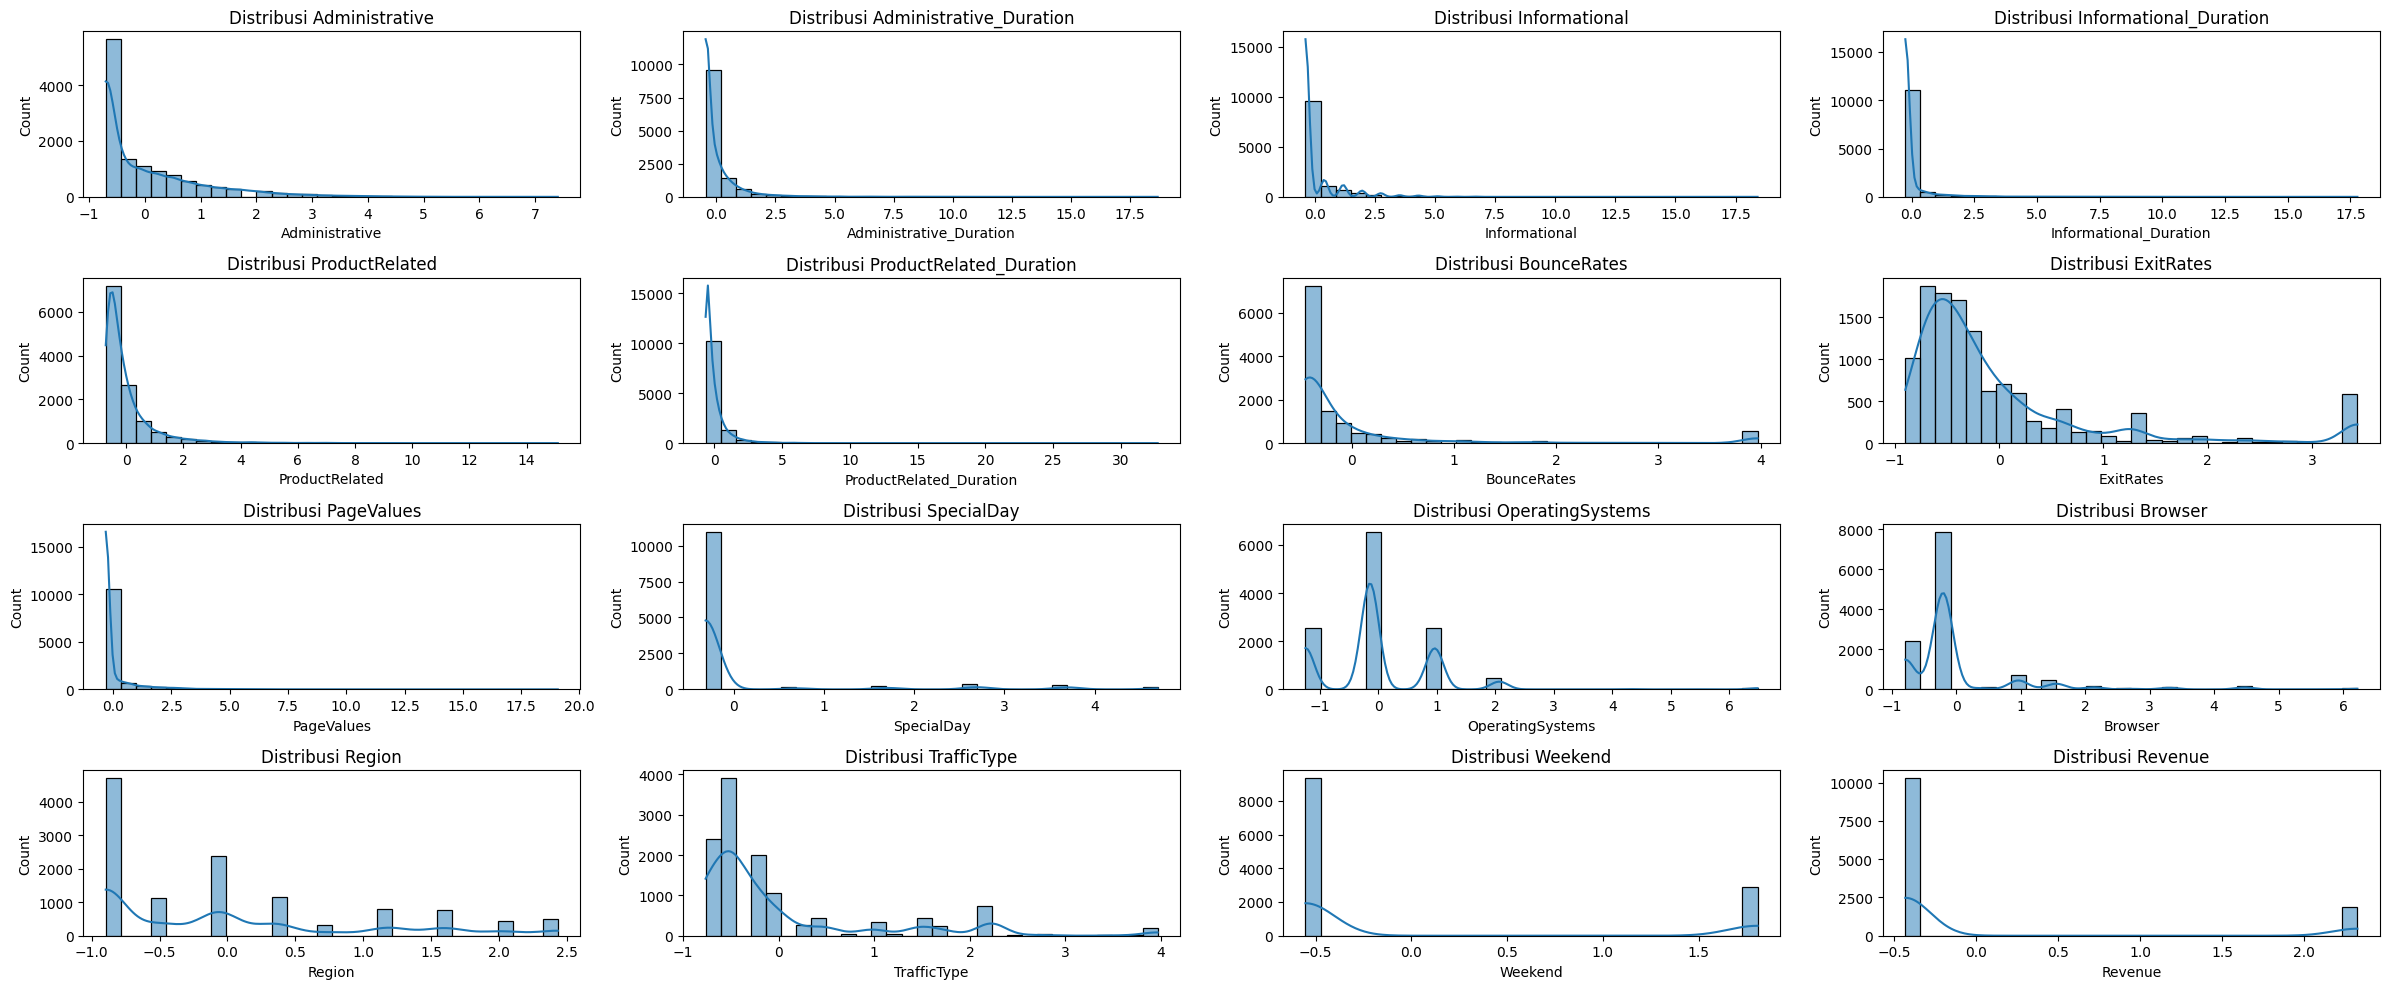

In [ ]:
plt.figure(figsize=(24, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, (len(numerical_cols) + 3) // 4, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

- ## Visualisasi Jumlah VisitorType Unik per Bulan
Pada bagian ini, kita akan memvisualisasikan jumlah tipe pengunjung unik `VisitorType` pada setiap bulan `Month` untuk melihat variasi pengunjung pada periode waktu yang berbeda.

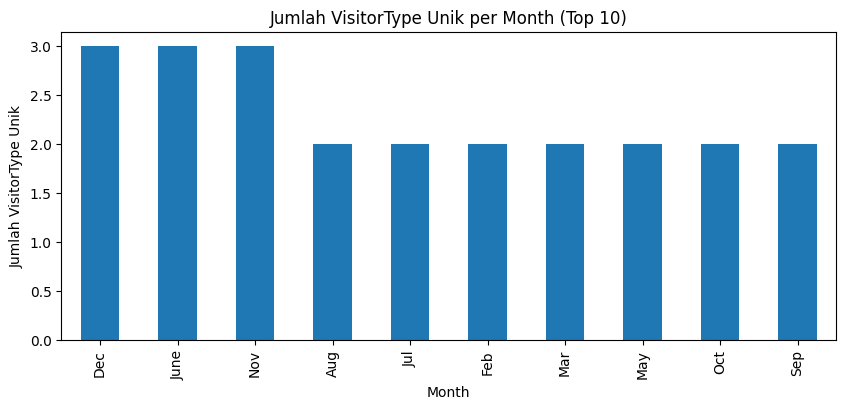

In [ ]:
if 'Month' in df.columns and 'VisitorType' in df.columns:
    unique_visitors = df.groupby('Month')['VisitorType'].nunique().sort_values(ascending=False)
    unique_visitors.head(10).plot(kind='bar', figsize=(10, 4), title='Jumlah VisitorType Unik per Month (Top 10)')
    plt.ylabel('Jumlah VisitorType Unik')
    plt.xlabel('Month')
    plt.show()

- ### Visualisasi Korelasi antar Fitur Numerik
    Pada bagian ini, kita akan memvisualisasikan korelasi antar fitur numerik menggunakan heatmap untuk melihat hubungan antar variabel numerik dalam dataset.

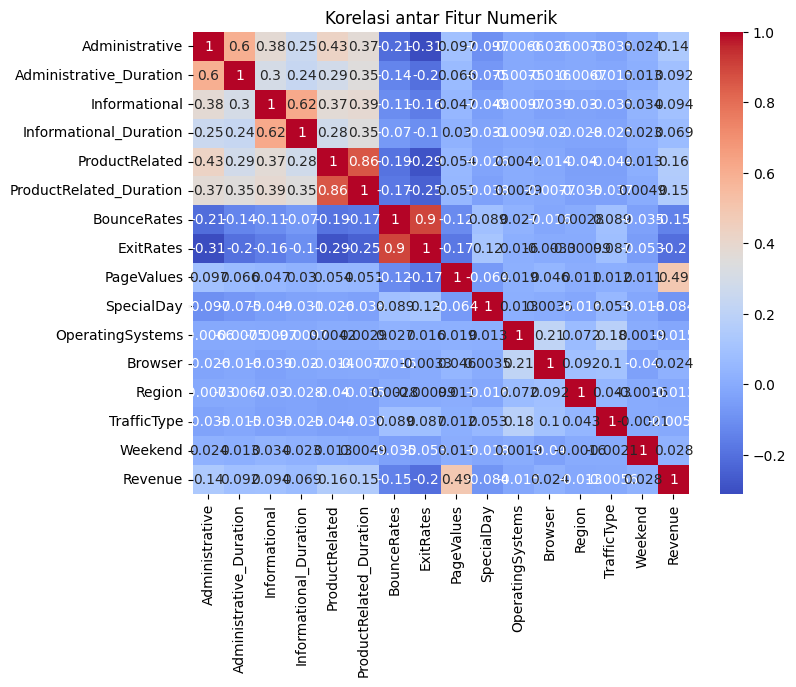

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar Fitur Numerik')
plt.show()

- ## Pembentukan Cluster dengan KMeans
Pada bagian ini, kita akan melakukan clustering pada data menggunakan algoritma KMeans. Data numerik akan digunakan sebagai fitur, dan hasil cluster akan ditambahkan ke dataframe sebagai kolom baru `Cluster`.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cols_for_similarity = [col for col in df_encoded.columns if col not in ['Revenue', 'cluster']]

X_cluster = df_encoded[cols_for_similarity]

n_clusters = 2

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_cluster)

df_encoded['cluster'] = cluster_labels

print(df_encoded['cluster'].value_counts())

sil_score = silhouette_score(X_cluster, df_encoded['cluster'])
print(f"Silhouette Score: {sil_score:.4f}")

cluster
0    11276
1      929
Name: count, dtype: int64
Silhouette Score: 0.7808


- ## Menentukan Nilai K Optimal pada KMeans dengan Metode Elbow

Pada bagian ini, kita akan menggunakan metode Elbow untuk menentukan jumlah cluster (k) yang optimal pada algoritma KMeans dengan memvisualisasikan nilai inertia untuk berbagai nilai k.

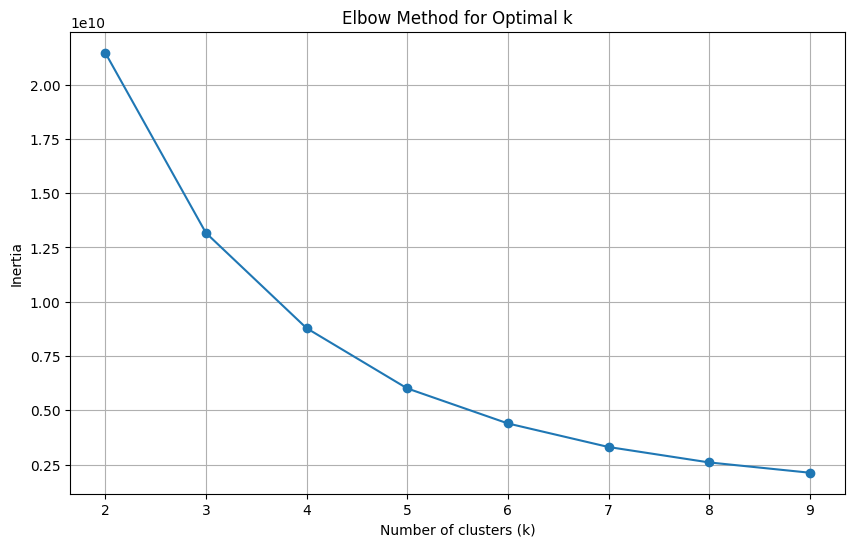

In [ ]:
cluster_range = range(2, 10)
inertia = []
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df_encoded[cols_for_similarity])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid()
plt.show()

- ## Evaluasi Model KMeans Clustering  
Bagian ini menampilkan evaluasi hasil clustering, termasuk jumlah cluster, distribusi anggota tiap cluster, nilai silhouette score, rata-rata Revenue pada tiap cluster, serta visualisasi rata-rata Revenue per cluster.

Evaluasi Model KMeans Clustering
Jumlah cluster: 2
Distribusi anggota tiap cluster:
cluster
0    11276
1      929
Name: count, dtype: int64
Silhouette Score: 0.7808

Rata-rata Revenue pada tiap cluster:
cluster
0    0.144111
1    0.304629
Name: Revenue, dtype: float64


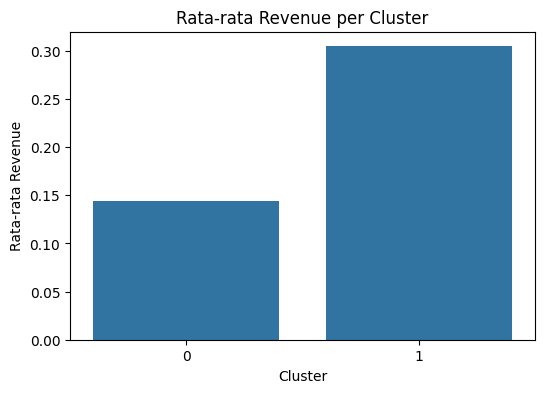

In [ ]:
print("Evaluasi Model KMeans Clustering")
print(f"Jumlah cluster: {n_clusters}")
print(f"Distribusi anggota tiap cluster:\n{df_encoded['cluster'].value_counts()}")
print(f"Silhouette Score: {sil_score:.4f}")

cluster_revenue = df_encoded.groupby('cluster')['Revenue'].mean()
print("\nRata-rata Revenue pada tiap cluster:")
print(cluster_revenue)

plt.figure(figsize=(6,4))
sns.barplot(x=cluster_revenue.index, y=cluster_revenue.values)
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Revenue')
plt.title('Rata-rata Revenue per Cluster')
plt.show()